<a href="https://colab.research.google.com/github/Thandriss/telecom_labs/blob/main/Makhonko_lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-25 12:26:22--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-25 12:26:22--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-04-25 12:26:22 (4.63 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [19]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

import warnings


##Упражнение 3

В этом задании я взял пример с трубой и оркестром.В задании нужно применить фильтр низ-
ких частот до выборки, затем применить фильтр низких частот для удаления спектральных
копий, вызванные выборкой. Результат должен быть идентичен отфильтрованному сигналу.

In [20]:
if not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/Thandriss/telecom_labs/raw/main/170255__dublie__trumpet.wav

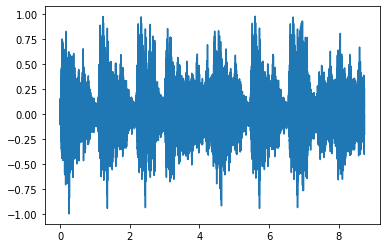

In [21]:
from thinkdsp import read_wave
wave = read_wave('170255__dublie__trumpet.wav')
wave.normalize()
wave.plot()

In [22]:
wave.make_audio()

Сигнал дискретизируется с частотой 44100 hz.

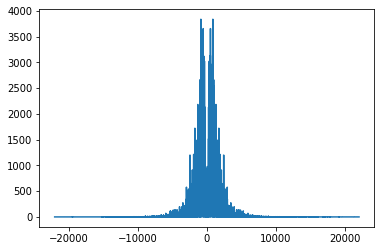

In [23]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Уменьшим частоту дискретизации в 3 раза.

In [24]:
factor = 3
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

Перед выборкой применим фильтр сглаживания для удаления частот выше новой частоты
сворачивания которая равна framerate/2.

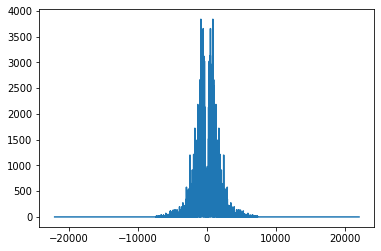

In [25]:
spectrum.low_pass(cutoff)
spectrum.plot()

Вот как звучит сигнал после фильтрации:

In [26]:
filtered = spectrum.make_wave()
filtered.make_audio()

Функция, которая имитирует процесс выборки:

In [27]:
from thinkdsp import Wave

def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate) 

Результат содержит копии спектра около 20 кГц, они не очень заметны

In [28]:
sampled = sample(filtered, factor)
sampled.make_audio()

Но они появляются в спектре:

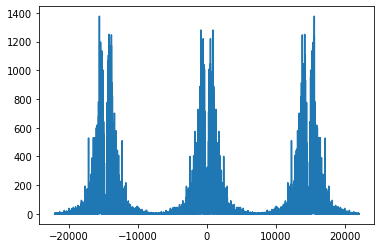

In [29]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Можно избавиться от спектральных копий, снова примениф фильтр НЧ:

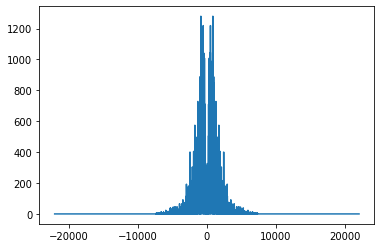

In [30]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

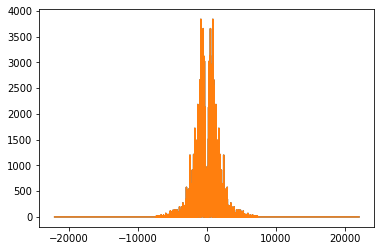

In [31]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

Теперь разница между спектром до и после отбора не должна быть небольшой:

In [32]:
spectrum.max_diff(sampled_spectrum)

0.02530776902491209

In [33]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

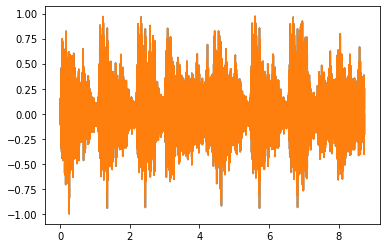

In [34]:
filtered.plot()
interpolated.plot()

In [35]:
filtered.max_diff(interpolated)

0.001459123126884179

Разница между интерполированной волной и фильтрованной волной совсем небольшая.